# 12 Years on Steam: An Analysis of Time and Money Spent
## Tracking Over a Decade of Gaming Habits and Expenses

<img src="image_repository/project_steam/steam_logo.png" style="width:600px; display:block; margin:auto; padding:10px;"/>



## Introduction

Ever wonder how much time you've spent sleeping, commuting, or on other daily routines? I think about this often and wish real life had a statistics tracker, just like an RPG. Thankfully, some aspects of life can be tracked, and Steam playtime and money spending are among them.

This project began as a curiosity-driven exercise, allowing me to apply what I've learned in data analysis. My goal here is to uncover some interesting insights, including:

**1 - Total playtime in hours;**  
**2 - Total spending on games;**  
**3 - Earnings from Steam through game cards, in-game drops, and skins;**  
**4 - Spending on gifting.**

For those interested in a quick, personalized look, **SteamDB** (https://steamdb.info/calculator/) provides a useful profile calculator based on public data, including estimated Steam cost based on games prices. While SteamDB can answer some of these questions, this analysis was done entirely for study and fun 😊

### Now, into the Analysis:

In [1]:
# Used libraries for datasets
import requests
import json
import pandas as pd
from datetime import datetime
from typing import List, Optional

# Library used to get the ENV file
import os
from dotenv import load_dotenv

# To ignore warnings as "descontinued functions"
import warnings
warnings.filterwarnings("ignore")

# Libraries for plots and to change its style
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

# Library to make print visually beter
from rich.console import Console

# Loading the env file where the API_KEY and the STEAM_ID are
load_dotenv('env')
api_key = os.getenv('api_key')
steam_id = os.getenv('steam_id')

# API endpoint and parameters
url = "http://api.steampowered.com/IPlayerService/GetOwnedGames/v0001/"
params = {
    'key': api_key,
    'steamid': steam_id,
    'include_appinfo': True,  
    'include_played_free_games': True,  
    'format': 'json' 
}

response = requests.get(url, params=params)
data = response.json()

# Reading the data
games_list = data['response']['games']
games_df = pd.DataFrame(games_list)

In [2]:
# Displaying a sample of the filtered dataframe
display(games_df)

,appid,name,playtime_forever,img_icon_url,has_community_visible_stats,playtime_windows_forever,playtime_mac_forever,playtime_linux_forever,playtime_deck_forever,rtime_last_played,playtime_disconnected,content_descriptorids,playtime_2weeks,has_leaderboards
0,4000,Garry's Mod,466,4a6f25cfa2426445d0d9d6e233408de4d371ce8b,True,0,0,0,0,1374269079,0,NaN,NaN,NaN
1,2310,Quake,928,e5bdf8dc7759c573fe525d45b69011f6a173a984,True,928,0,0,0,1693233828,0,NaN,NaN,NaN
2,2320,Quake II,839,f4f8eda991901eae74562c30ba6e68715e3d6dcf,True,839,0,0,0,1695047136,0,NaN,NaN,NaN
3,2360,Hexen: Beyond Heretic,0,1675fc2c52142b25165a1dfb15deeb614c2dbb0b,NaN,0,0,0,0,0,0,NaN,NaN,NaN
4,2370,Hexen: Deathkings of the Dark Citadel,0,1675fc2c52142b25165a1dfb15deeb614c2dbb0b,NaN,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,321270,UNLOVED,0,209bf1dc3fa504d91b601fb06d2159dee17d72c4,True,0,0,0,0,0,0,"[2, 5]",NaN,NaN
942,585690,Minimalism,0,7c42783fcca64ee838bafc8a823af8b883ad0cf3,True,0,0,0,0,0,0,NaN,NaN,NaN
943,29900,Dark Sector,0,e1eede77996260a65a37d3610634ed88a0b6a6db,NaN,0,0,0,0,0,0,"[2, 5]",NaN,NaN
944,440,Team Fortress 2,6168,e3f595a92552da3d664ad00277fad2107345f743,True,0,0,0,0,1557634553,0,NaN,NaN,True


#### The Dataframe generated has a lot of unnecessary information, let's make it clearer.

In [3]:
# Removing unnecessary columns
games_df = games_df.drop(columns=[
    'img_icon_url', 
    'has_community_visible_stats',
    'content_descriptorids', 
    'has_leaderboards',
    'playtime_windows_forever',
    'playtime_mac_forever',
    'playtime_linux_forever',
    'playtime_deck_forever']
    )

# Renaming Columns
games_df.rename(columns={
    'appid': 'game_id',
    'name': 'game_name',
    'playtime_forever': 'full_playtime',
    'rtime_last_played': 'last_played_date',
    'playtime_disconnected': 'time_played_disconnected',
    'playtime_2weeks': 'time_played_in_2_weeks'
}, inplace=True)

# Replacing NaN to 0 and converting full_playtime to hours
games_df['full_playtime'] = games_df['full_playtime'].fillna(0) / 60
games_df['full_playtime'] = games_df['full_playtime'].astype(int)

# Replacing NaN to 0 and converting time_played_in_2_weeks to hours
games_df['time_played_in_2_weeks'] = games_df['time_played_in_2_weeks'].fillna(0) / 60
games_df['time_played_in_2_weeks'] = games_df['time_played_in_2_weeks'].astype(int)  

# Connverting last_played_date to a correct format
games_df['last_played_date'] = pd.to_datetime(games_df['last_played_date'], unit='s')

# Formating the date
games_df['last_played_date'] = games_df['last_played_date'].dt.strftime('%d/%m/%Y %H:%M:%S')

# Displaying the filtered DF
games_df

,game_id,game_name,full_playtime,last_played_date,time_played_disconnected,time_played_in_2_weeks
0,4000,Garry's Mod,7,19/07/2013 21:24:39,0,0
1,2310,Quake,15,28/08/2023 14:43:48,0,0
2,2320,Quake II,13,18/09/2023 14:25:36,0,0
3,2360,Hexen: Beyond Heretic,0,01/01/1970 00:00:00,0,0
4,2370,Hexen: Deathkings of the Dark Citadel,0,01/01/1970 00:00:00,0,0
...,...,...,...,...,...,...
941,321270,UNLOVED,0,01/01/1970 00:00:00,0,0
942,585690,Minimalism,0,01/01/1970 00:00:00,0,0
943,29900,Dark Sector,0,01/01/1970 00:00:00,0,0
944,440,Team Fortress 2,102,12/05/2019 04:15:53,0,0


#### One of the first questions I wondered was: how many games on my Steam library has never been played? <br> <br> Let's find out

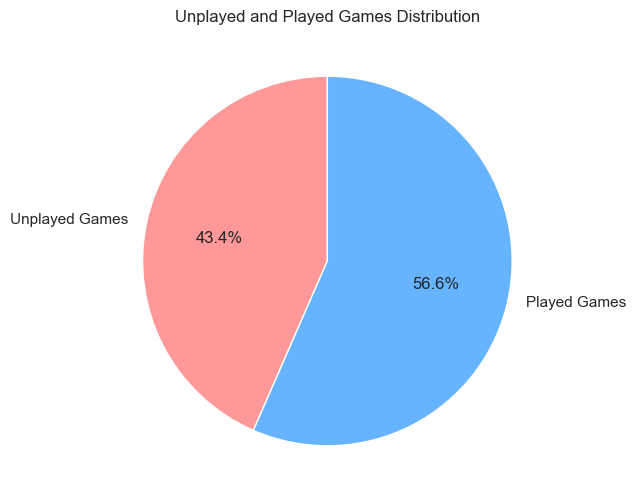

In [4]:
# Creating a unplayed games and a played games DFs
unplayed_games_df = games_df[games_df['full_playtime'] == 0]
played_games_df = games_df[games_df['full_playtime'] != 0]

# Creating a function to creat pie charts
def create_pie_chart(labels:List[str], 
                     sizes:List[float], 
                     title:str ='Pie Chart',  
                     colors:Optional[List[str]] = None,
                     ax = None) -> None:
    
    if colors is None:
        colors = ['#ff9999', '#66b3ff']

    # Check if plotting in a subplot or not
    if ax is None:
        plt.figure(figsize=(8, 6))
        plt.pie(sizes, 
                labels=labels, 
                autopct='%1.1f%%', 
                startangle=90, 
                colors=colors
               )
        plt.title(title)
        plt.show()
    else:
        ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
        ax.set_title(title)
        
# Data for the plot
labels = ['Unplayed Games', 'Played Games']
sizes = [len(unplayed_games_df), len(played_games_df)]
colors = ['#ff9999', '#66b3ff']

# Creating the "pie" chart
create_pie_chart(labels=labels, 
                 sizes=sizes, 
                 title="Unplayed and Played Games Distribution", 
                 colors=colors
                )

#### The second questions was: which games were the most played?

In [5]:
# Defining the top 5 played games

top_5_games = games_df.sort_values(by='full_playtime', ascending=False).head()
top_5_games

,game_id,game_name,full_playtime,last_played_date,time_played_disconnected,time_played_in_2_weeks
97,730,Counter-Strike 2,4330,27/11/2024 11:51:20,1,9
652,960090,Bloons TD 6,1545,28/11/2024 12:44:57,56,8
192,250900,The Binding of Isaac: Rebirth,1157,20/11/2024 05:16:37,0,0
88,202990,Call of Duty: Black Ops II - Multiplayer,897,12/12/2017 03:35:43,0,0
383,377160,Fallout 4,777,21/09/2024 18:28:40,1,0


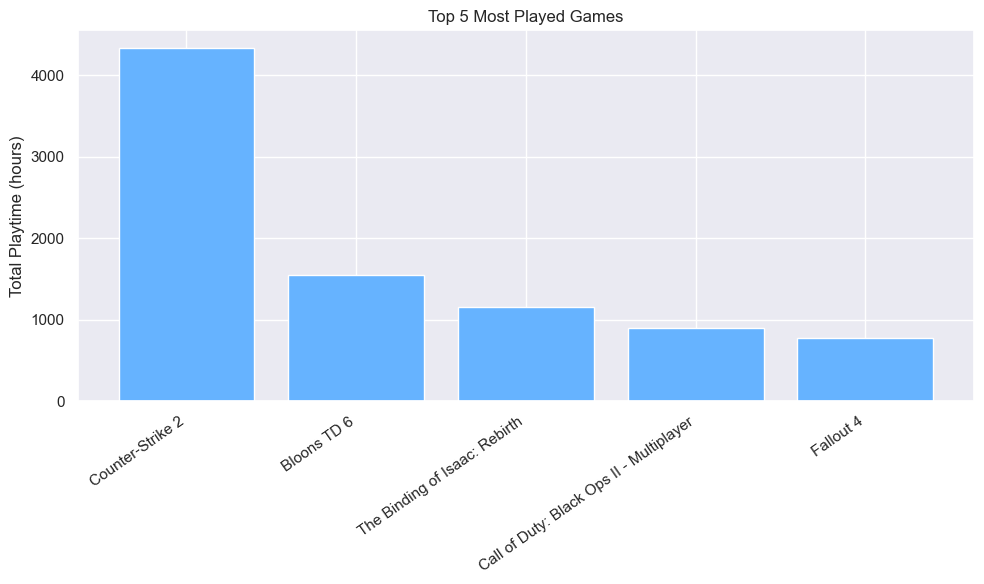

In [6]:
# Creating a function to creat bar charts

def create_bar_chart(x_data: List[str], 
                     y_data: List[float],
                     title: str ='Bar Chart', 
                     ylabel: str = 'ylabel', 
                     colors: Optional[str] = None) -> None:
    
    if colors is None:
        colors = '#66b3ff'
        
    plt.figure(figsize=(10, 6))
    plt.bar(x_data, y_data, color=colors)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=35, ha='right')
    plt.tight_layout()
    plt.show()

# Plotting the top 5 games
x_data = top_5_games['game_name']
y_data = top_5_games['full_playtime']
title = "Top 5 Most Played Games"
ylabel = "Total Playtime (hours)"

create_bar_chart(x_data=x_data, y_data=y_data, title=title, ylabel=ylabel)

<strong>Counter-Strike</strong> will always be my number one game, because in this game, YOU get better, not your character. It's, in my opinion, the best competitive game out there, and it's more than just a game for me.

Funny enough, a game about a monkey popping balloons is in my second place. <strong>Bloons Tower Defense</strong> is incredibly enjoyable and a great relaxing game.

<strong>The Binding of Isaac</strong> is the perfect roguelike game in my view. The story is engaging, the gameplay is fantastic, and, being a roguelike, the item synergies are endless. You can experience thousands of combinations, making every playthrough completely different.

Even though <strong>Black Ops 2</strong> was released in 2012 and I only played it that year, it's incredible to see that no game has surpassed its total playtime for me. It brings back memories of school days with no responsibilities.

Lastly, <strong>Fallout 4</strong>, despite being a single-player game, is a yearly go-to for me. I love replaying it and modding it endlessly. It is such a fun experience.

#### Now, let's find out how many hours of gameplay I have in all these games

My total playtime in 12 years is 20706 hours, this is the equivalent to 2.36 years!

The mean of that is 1725.50 hours every year

The sum of the TOP 5 games only are 8706 hours, that is 42.05%

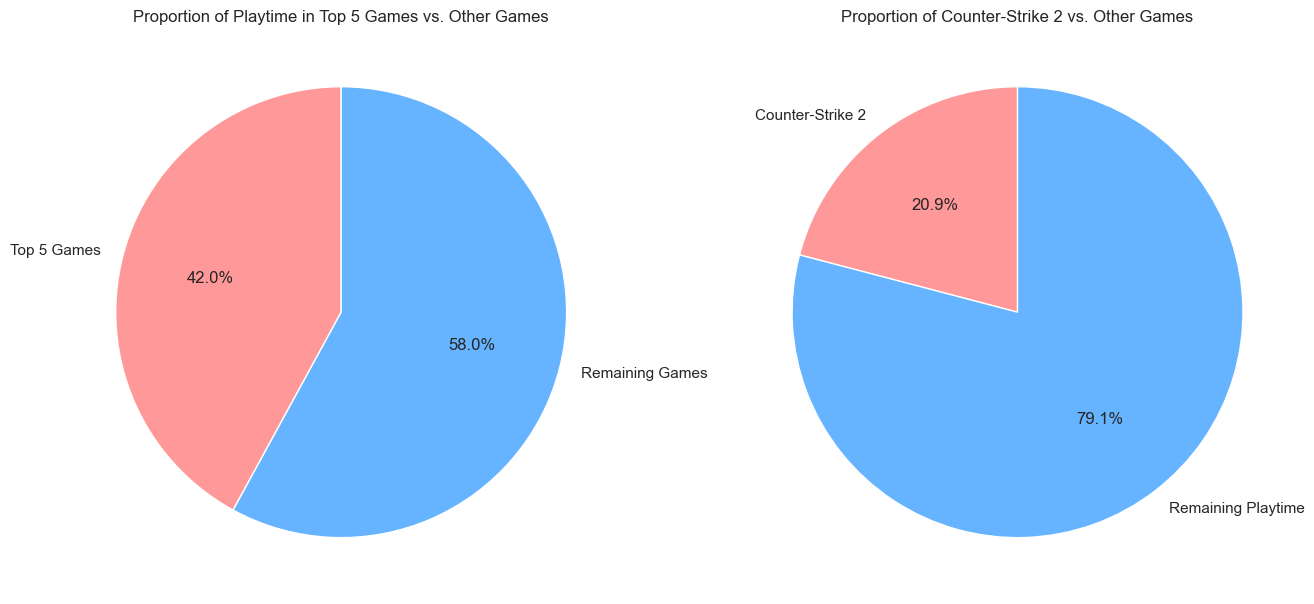

In [7]:
# Creating variables to get the sum, mean and the numbers of years
total_playtime = games_df['full_playtime'].sum()
playtime_mean = total_playtime / 12
total_years = total_playtime / (24 * 365) 
top_5_games_hour_sum = top_5_games['full_playtime'].sum()
percentage_top_5 = (top_5_games_hour_sum / total_playtime) * 100

# Showing the values using "Rich" Library
console = Console()
console.print(f"My total playtime in 12 years is [green]{total_playtime}[/green] hours, "
              f"this is the equivalent to [green]{total_years:.2f}[/green] years!")
console.print(f"The mean of that is [green]{playtime_mean:.2f}[/green] hours every year")
console.print(f"The sum of the TOP 5 games only are [green]{top_5_games_hour_sum}[/green] hours, that is [blue]{percentage_top_5:.2f}%[/blue]")

# Plotting the charts
remaining_playtime = total_playtime - top_5_games_hour_sum 
counter_strike_hours = games_df[games_df['game_name'] == 'Counter-Strike 2']['full_playtime'].values[0]
remaining_without_cs = total_playtime - counter_strike_hours

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Primeiro gráfico
create_pie_chart(labels=['Top 5 Games', 'Remaining Games'], 
                 sizes=[top_5_games_hour_sum, remaining_playtime], 
                 title="Proportion of Playtime in Top 5 Games vs. Other Games", 
                 ax=ax1)

# Segundo gráfico
create_pie_chart(labels=['Counter-Strike 2', 'Remaining Playtime'], 
                 sizes=[counter_strike_hours, remaining_without_cs], 
                 title="Proportion of Counter-Strike 2 vs. Other Games", 
                 ax=ax2)


<strong>Counter-Strike</strong> alone represents a huge amount of hours, especially considering this calculation was made with 947 games. 

## Now, into a Deep Analysis of the Expenses on Steam Over a Decade

To accurately track Steam expenses, it's necessary to go to your app > Account Details > View Purchase History.

However, the chart that Steam provides can be a bit messy for extraction purposes. Don't get me wrong, it's well-organized, but when you copy it into a sheet, the lines and columns are not exactly "panda-friendly".

Here is a sample of it:

<img src="image_repository/project_steam/steam_app_sheet.png" style="width:500px; display:block; margin:auto; padding:10px;"/>

To make it work properly, some Google Sheets formulas were used. Two new columns were created: **"is_credit"** and **"is_gift"** to easily apply filters. This was necessary because, in the original Steam sheet, the **"credit"** information was tied to the same line as the **total** column, and the **"gift"** information was tied to the **items** column.

Here is the result after the cleaning:

<img src="image_repository/project_steam/google_sheets_steam_sheet.png" style="width:1000px; display:block; margin:auto; padding:10px;"/>

Now that we got this settled, let's dive into the analysis!

In [8]:
# Reading the cleaned expenses chart extracted from the Steam App for a DF sample
steam_expenses = pd.read_excel('steam_expenses.xlsx')

# Adjusting date to datetime
steam_expenses['date'] = pd.to_datetime(steam_expenses['date'], format='%d %b, %Y')
steam_expenses

,date,items,type,total,is_credit,is_gift
0,2024-10-27,Steam Community Market,3 Market Transactions\nWallet,0.51,True,False
1,2024-10-24,"Purchased 100,00 Wallet",Purchase\nPIX,100.00,False,False
2,2024-10-24,The Quarry - Deluxe Edition,Purchase\nWallet,17.38,False,False
3,2024-10-24,Steam Community Market,Market Transaction\nWallet,4.74,True,False
4,2024-10-21,Kiwi Clicker,Purchase\nWallet,5.94,False,False
...,...,...,...,...,...,...
1576,2013-02-19,Garry's Mod,Purchase\nBoleto Bancario,4.24,False,False
1577,2013-02-15,Call of Duty: Black Ops II - Season Pass,Gift Purchase\nBoleto Bancario,89.99,False,False
1578,2013-02-01,Call of Duty: Black Ops II - Season Pass,Purchase\nBoleto Bancario,89.99,False,False
1579,2012-12-01,Call of Duty - Black Ops II,Gift Purchase\nBoleto Bancario,109.99,False,False


## To find out how much money was spent, there are some factors that need to be taken into consideration:
There are fields in the chart where money was put directly into Steam Wallet, however, these don't count to the total value since, when something is bought on Steam, the price is shown as well. I noticed that only after reading the DF sample, otherwise, I would have fixed on the original sheet itself. 

So, to find out the correct amount, we must discover how much money was put into the steam wallet, deduct from the total amount spent and also subtract the money won with market transactions. The operation will go as:

1. Calculate the total amount with no constraints;
2. Find out how much money was made on Steam identifying the wallet credits;
3. How much money was injected into the Steam Wallet (this value will not add up to the total calculated amount;
4. How many gifts were given and the total costs;
5. Subtract number 2 and 3 from the total.


### Calculating the amount 

In [9]:
# Total amount without calculations
total_expenses = steam_expenses.loc[steam_expenses['is_credit'] == False, 'total'].sum()

# Finding out how much money was made during all these years using Steam 
total_credit_sum = steam_expenses.loc[steam_expenses['is_credit'] == True, 'total'].sum()

# Finding out times where money was directly injected into Steam wallet
wallet_injection = steam_expenses[steam_expenses['items'].str.contains('Purchased')]
wallet_injection_total = steam_expenses[steam_expenses['items'].str.contains('Purchased')]['total'].sum()

# Total expense spent on Steam taking into consideration the deductions of the wallet amounts and credits 
calculated_total_expenses = total_expenses - wallet_injection_total - total_credit_sum

# Sample of Wallet injection
wallet_injection.head()

,date,items,type,total,is_credit,is_gift
1,2024-10-24,"Purchased 100,00 Wallet",Purchase\nPIX,100.0,False,False
8,2024-10-01,"Purchased 150,00 Wallet",Purchase\nPIX,150.0,False,False
15,2024-09-03,"Purchased 100,00 Wallet",Purchase\nPIX,100.0,False,False
17,2024-08-28,"Purchased 100,00 Wallet",Purchase\nPIX,100.0,False,False
27,2024-07-26,"Purchased 100,00 Wallet",Purchase\nPIX,100.0,False,False


### How much was spent on gifts?

In [10]:
# Calculating the amount
gift_df =  steam_expenses.loc[steam_expenses['is_gift'] == True]
gift_total = gift_df['total'].sum()

# Sample of the gift DF
gift_df.head()

,date,items,type,total,is_credit,is_gift
31,2024-07-09,Bloons TD 6\n\nGift sent to Pâm,Gift Purchase\nWallet,2.78,False,True
272,2022-07-21,Left 4 Dead 2\n\nGift sent to Pâm,Gift Purchase\nWallet,4.13,False,True
320,2022-03-09,Overcooked! 2\n\nGift sent to mari_tomaz,Gift Purchase\nWallet,14.97,False,True
332,2022-01-27,Overcooked\n\nGift sent to mari_tomaz,Gift Purchase\nWallet,7.79,False,True
405,2021-07-02,Gemini\n\nGift sent to ka,Gift Purchase\nWallet,1.19,False,True


### Who was the most gifted person on my Steam Account?

In [11]:
# Filtering by names found in the Items column
names_to_filter = [
    "Pâm", "ka", "mari_tomaz", "Lana Del Rage", 
    "HighAndDriving2", "ShasOkais", "ElKillaN", 
    "Greed", "Triz", "nicmarcos", "Narutinho", "Code Master"
]

# Creating a dataframe with the names, the number of gifts and how much was spent with each individual
gift_summary = pd.DataFrame({
    'Name': names_to_filter,
    'Gift Count': [gift_df[gift_df['items'].str.contains(f"Gift sent to {name}")]['items'].count() for name in names_to_filter],
    'Total Spent': [gift_df[gift_df['items'].str.contains(f"Gift sent to {name}")]['total'].sum() for name in names_to_filter]
})

# Ordering the values

gift_summary = gift_summary.sort_values(by='Total Spent', ascending=False)

# Creating a table
styled_table = gift_summary.style.bar(subset=['Total Spent'], color='#5fba7d').set_caption("Gastos e Presentes Enviados")
styled_table

,Name,Gift Count,Total Spent
3,Lana Del Rage,13,185.010000
6,ElKillaN,8,170.930000
7,Greed,2,81.180000
2,mari_tomaz,2,22.760000
8,Triz,3,20.770000
11,Code Master,1,12.490000
9,nicmarcos,1,9.190000
4,HighAndDriving2,1,6.990000
0,Pâm,2,6.910000
1,ka,2,2.400000


### Now, let's find out how much was spent in every year

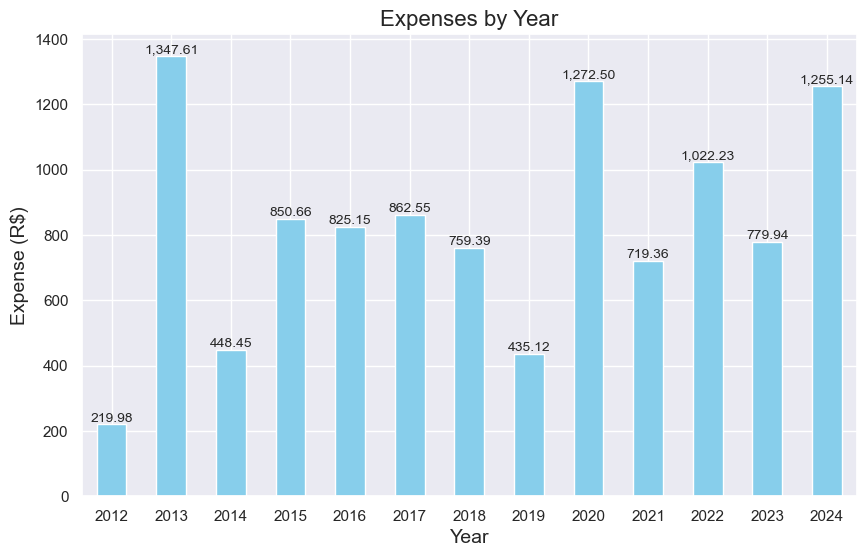

In [12]:
# Filtering the lines where there was no wallet injection, using ~ to invert the condition
steam_expenses_filtered = steam_expenses[
    ~steam_expenses['items'].str.contains("PURCHASED", case=False, na=False) & 
    ~steam_expenses['is_credit'] 
]

yearly_expenses = steam_expenses_filtered.groupby(steam_expenses_filtered['date'].dt.year)['total'].sum()

# Grouping and summing by year
yearly_expenses = steam_expenses_filtered.groupby(steam_expenses_filtered['date'].dt.year)['total'].sum()

# Creating the chart
plt.figure(figsize=(10, 6))
bars = yearly_expenses.plot(kind='bar', color='skyblue', rot=0)

# Adding the number values to the chart for better visualization
for index, value in enumerate(yearly_expenses):
    plt.text(index, value, f"{value:,.2f}", ha='center', va='bottom', fontsize=10)

# Creating titles
plt.title('Expenses by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Expense (R$)', fontsize=14)

# Plotting the chart
plt.xticks(rotation=0)
plt.show()

The chart demonstrates that **2013** was the year when the most money was spent, while **2012**, the least. This is because my Steam account was only used for the first time at the end of 2012, when I purchased **Black Ops 2**.


Now, one last piece of information to uncover:  
**What was the most commonly used payment method?**

In [13]:
# Creating a filter of the payment methods found using value_counts in the DataFrame
methods_to_filter = [
	"Purchase\nPIX", "Purchase\nWallet", "Purchase\nMasterCard", 
    "Purchase\nPayPal", "Purchase\nVisa", "Purchase\nBoleto Bancario",  
    "Purchase\nItau Online", "Refund\nWallet"
]

# Renaming the methods in the "items" list for the DataFrame
renamed_methods = [
    method.replace("\n", " ").replace("Purchase", "") for method in methods_to_filter
]

# Creating the DataFrame with the data and better names
method_summary = pd.DataFrame({
    'Method': renamed_methods,
    'Number of times': [
        steam_expenses[steam_expenses['type'].str.contains(method, case=False, na=False)]['type'].count()
        for method in methods_to_filter
    ]
})

# Displaying the DataFrame
method_summary

,Method,Number of times
0,PIX,10
1,Wallet,408
2,MasterCard,43
3,PayPal,3
4,Visa,2
5,Boleto Bancario,78
6,Itau Online,5
7,Refund Wallet,12


As shown, **wallet transactions** are the predominant payment method, followed by **"Boleto Bancário"**. It’s important to note that most "boleto" transactions were made back in 2012 and 2013, a time when PIX didn’t exist and I didn’t have a credit card. During that period, I was working my first job and received checks as payment.

One last investigation, let's find out which month I spent the most, and why:

In [14]:
# Creating a DataFrame without credits, Wallet injections and Refund cases
calculated_df = steam_expenses[
    ~steam_expenses['is_credit'] &
    ~steam_expenses['items'].str.contains('Purchased', case=False, na=False) &
    ~steam_expenses['items'].str.contains('Refund', case=False, na=False)
]

# Creating new columns for the new DataFrame
calculated_df['Year'] = calculated_df['date'].dt.year
calculated_df['Month'] = calculated_df['date'].dt.month

# Grouping the columns
monthly_expenses = calculated_df.groupby(['Year', 'Month'])['total'].sum().reset_index()

# Finding out the month with most expenses
max_monthly_expenses = monthly_expenses.loc[
    monthly_expenses.groupby('Year')['total'].idxmax()
]

# Showing the DataFrame
max_monthly_expenses

,Year,Month,total
0,2012,11,109.99
2,2013,2,357.12
18,2014,6,79.45
31,2015,8,230.15
36,2016,1,210.91
57,2017,11,331.13
66,2018,8,117.92
71,2019,1,159.00
88,2020,9,227.93
102,2021,12,232.89


I was expecting a clearer pattern, where most of my spending would happen at the end of the year, around major game releases. However, the data shows that while I tend to spend more after the middle of the year, this isn’t a consistent behavior.  

One key detail to keep in mind is the timing of Steam's biggest sales. The **Winter Sale** typically happens in **December and January**, the **Spring Sale** in **March**, and the **Summer Sale** in **June and July**. Besides these, there are plenty of themed sales scattered throughout the year, which might explain some variations.

### In sum, here is a graphic showcasing all the money involved in my Steam account:

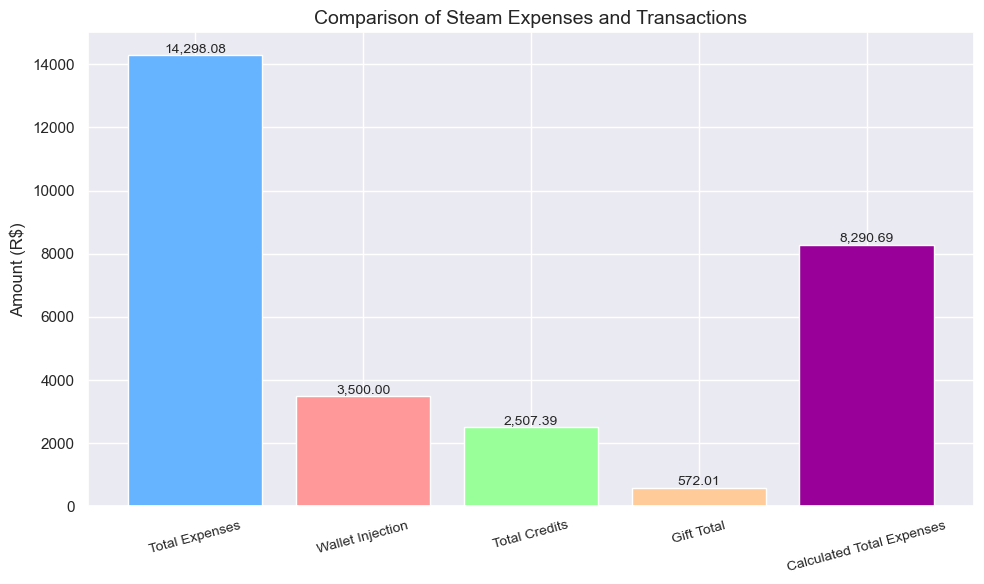

In [15]:
# Creating values, labels and colors for the chart
values = [
    total_expenses, 
    wallet_injection_total,
    total_credit_sum, 
    gift_total,
    calculated_total_expenses
]

labels = [
    "Total Expenses", 
    "Wallet Injection", 
    "Total Credits", 
    "Gift Total",
    "Calculated Total Expenses"
]

colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99', '#990099']

# Setting the chart
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=colors)

# Adding the number values to the chart for better visualization
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
    f"{bar.get_height():,.2f}", ha='center', va='bottom', fontsize=10)

# Plotting the chart
plt.title("Comparison of Steam Expenses and Transactions", fontsize=14)
plt.ylabel("Amount (R$)", fontsize=12)
plt.xticks(rotation=15, fontsize=10)
plt.tight_layout()
plt.show()

## Wrap up

This project was a fun way to look back on over 10 years of gaming on Steam. It wasn’t just about crunching numbers—it was about reflecting on how gaming has been such a big part of my life.

I got to see how much time I’ve spent on my favorite games, like Counter-Strike, which will always be my number one because it’s about you getting better, not your character. I also discovered how a casual game like Bloons Tower Defense made its way to second place and how games like Fallout 4 keep bringing me back year after year.

On the money side, it was cool to see my spending habits over the years. 2013 was my biggest spending year, while 2012 was the least since I had just started using Steam. Wallet transactions turned out to be my go-to payment method, and the early days reminded me of how I used to rely on Boleto Bancário back when PIX didn’t exist, and I didn’t have a credit card.

In the end, this wasn’t just about data—it was about reliving great memories and learning a bit more about myself through gaming. 😊